In [2]:
import sympy as sp
import numpy as np
from sympy.physics.vector import dynamicsymbols
from sympy.physics.vector import time_derivative
from sympy.physics.vector import ReferenceFrame
N = ReferenceFrame('N')
import pylab as pl
import control
from sympy.physics.mechanics import *
from numpy.linalg import matrix_rank, eig
import WIP_utils as utils
import modern_robotics as mr
import matplotlib.pyplot as plt



In [4]:
RAD2DEG = 180/np.pi




def theta_print():
    print(theta[0])

def theta_q():
    global theta
    theta = [1,2,3,4]

In [5]:
theta_q()


In [6]:
theta_print()

1


In [54]:
time, traj = utils.Trapezoidal_Traj_Gen_Given_Amax_and_T(0.5,3,0.01)

In [55]:
traj

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 2.50000000e-05,  5.00000000e-03,  5.00000000e-01],
       [ 1.00000000e-04,  1.00000000e-02,  5.00000000e-01],
       [ 2.25000000e-04,  1.50000000e-02,  5.00000000e-01],
       [ 4.00000000e-04,  2.00000000e-02,  5.00000000e-01],
       [ 6.25000000e-04,  2.50000000e-02,  5.00000000e-01],
       [ 9.00000000e-04,  3.00000000e-02,  5.00000000e-01],
       [ 1.22500000e-03,  3.50000000e-02,  5.00000000e-01],
       [ 1.60000000e-03,  4.00000000e-02,  5.00000000e-01],
       [ 2.02500000e-03,  4.50000000e-02,  5.00000000e-01],
       [ 2.50000000e-03,  5.00000000e-02,  5.00000000e-01],
       [ 3.02500000e-03,  5.50000000e-02,  5.00000000e-01],
       [ 3.60000000e-03,  6.00000000e-02,  5.00000000e-01],
       [ 4.22500000e-03,  6.50000000e-02,  5.00000000e-01],
       [ 4.90000000e-03,  7.00000000e-02,  5.00000000e-01],
       [ 5.62500000e-03,  7.50000000e-02

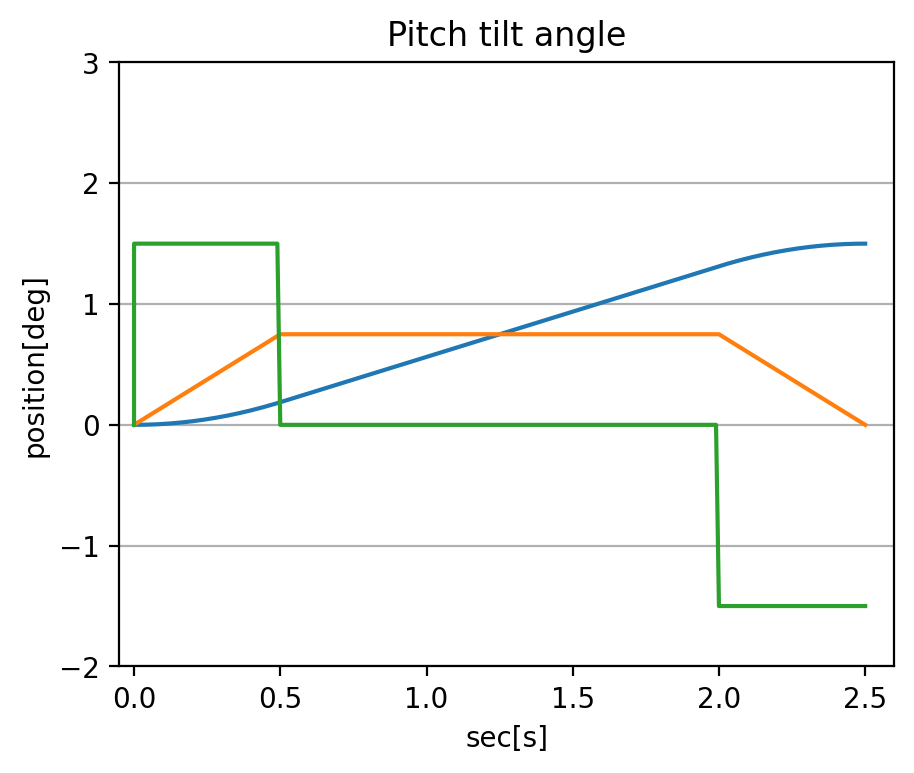

In [14]:
h = 0.8

m2 = 1.416
m3 = 1.739
m4 = 3.25+12.5

L1 = 0.171
L2 = 0.28
L3 = 0.28
L4 = 0.346

L2c = L2 *0.75
L3c = L3 / 2

theta_3, q2 = sp.symbols('theta_3, q2')

A = (h-L1-L4)/L2
B = m2*L2c + m3*L2+m4*L2
C = m3*L3c + m4*L3

f1 = sp.Eq(sp.cos(q2)+sp.sin(theta_3),float(A))
f2 = sp.Eq(-float(B)*sp.sin(q2)+float(C)*sp.cos(theta_3),0)
sol = sp.solve([f1,f2])
solu = sol[0]

q2 = solu[q2]
theta_3 = solu[theta_3]
q1 = np.pi/2
q3 = theta_3-q1-q2
q4 = -(q2+q3)

thetalistd = np.array([q1, q2, q3, q4])
thetalistd

array([1.5707963267948966, -0.945497664433305, 2.07691797181133,
       -1.13142030737802], dtype=object)

In [22]:
def get_torque_traj():
    time, traj = utils.Trapezoidal_Traj_Gen_Given_Amax_and_T(0.3,4.5,0.01)

    traj_th1 = utils.Path_Gen(0, 0, traj[:,0])
    traj_th2 = utils.Path_Gen(0, -0.9455, traj[:,0])
    traj_th3 = utils.Path_Gen(0, 2.0769, traj[:,0])
    traj_th4 = utils.Path_Gen(0, -1.1314, traj[:,0])

    traj_dth1 = utils.Path_Gen(0, 0, traj[:,1])
    traj_dth2 = utils.Path_Gen(0, -0.9455, traj[:,1])
    traj_dth3 = utils.Path_Gen(0, 2.0769, traj[:,1])
    traj_dth4 = utils.Path_Gen(0, -1.1314, traj[:,1])

    traj_ddth1 = utils.Path_Gen(0, 0, traj[:,2])
    traj_ddth2 = utils.Path_Gen(0, -0.9455, traj[:,2])
    traj_ddth3 = utils.Path_Gen(0, 2.0769, traj[:,2])
    traj_ddth4 = utils.Path_Gen(0, -1.1314, traj[:,2])
    
    theta_2 = 0
    theta_3 = 0
    
    m1 = 2.486 + 0.3
    m2 = 1.416
    m3 = 1.739
    m4 = 3.25+12.5
    
    L1 = 0.171
    L2 = 0.28
    L3 = 0.280
    L4 = 0.346

    eint = np.array([0.2, 0.2, 0.2, 0.2])
    g = np.array([0, 0, -9.8])
    
    M01 = np.array([[1, 0, 0,       0],
                    [0, 1, 0,       0],
                    [0, 0, 1,       0],
                    [0, 0, 0,       1]])
    M12 = np.array([[1, 0, 0,        0],
                    [0, 1, 0,       L1],
                    [0, 0,-1,        0],
                    [0, 0, 0,        1]])
    M23 = np.array([[ 1, 0, 0,      -L2*np.cos(theta_2)],
                    [ 0, 1, 0,      L2*np.sin(theta_2)],
                    [ 0, 0, -1,       0],
                    [ 0, 0, 0,       1]])
    M34 = np.array([[1, 0, 0,       L2*np.cos(theta_3)],
                    [0, 1, 0,       L2*np.sin(theta_3)],
                    [0, 0, -1,      0],
                    [0, 0, 0,       1]])
    M45 = np.array([[1, 0, 0,       0],
                    [0, 1, 0,      L4],
                    [0, 0, 1,       0],
                    [0, 0, 0,       1]])
    
    G1 = np.diag([0.010267, 0.010267, 0.00666, m1, m1, m1]) #X
    G2 = np.diag([0.010192583, 0.002390603, 0.009599672, m2, m2, m2])
    G3 = np.diag([0.008595913, 0.002944951, 0.007917693, m3, m3, m3])
    G4 = np.diag([0.0494433, 0.0494433, 0.004095, m4, m4, m4]) #X
    
    Glist = np.array([G1, G2, G3, G4])
    Mlist = np.array([M01, M12, M23, M34, M45])
    Slist = np.array([[0, 0, 1,      0, 0,     0],
                      [0, 0, -1,   -L1, 0,     0],
                      [0, 0, 1, L1 + L2 * np.sin(theta_2), -L2 * np.cos(theta_2), 0.425],
                      [0, 0, -1, -(L1 + L2 * np.sin(theta_2)+L3 * np.sin(theta_3)), L2 * np.cos(theta_2)-L3 * np.cos(theta_3), 0.425]]).T
    Kp = 1.3
    Ki = 1.2
    Kd = 1.1

    torquelist = np.array([0,0,0, 0])

    for i in range(0, len(time)-1):
        # thetalist = np.array([traj_th1[i], traj_th2[i], traj_th3[i]])
        # dthetalist = np.array([traj_dth1[i], traj_dth2[i], traj_dth3[i]])

        # thetalistd = np.array([traj_th1[i+1], traj_th2[i+1], traj_th3[i+1]])
        # dthetalistd = np.array([traj_dth1[i+1], traj_dth2[i+1], traj_dth3[i+1]])
        # ddthetalistd = np.array([traj_ddth1[i+1], traj_ddth2[i+1], traj_ddth3[i+1]])

        thetalist = np.array([traj_th1[i], traj_th2[i], traj_th3[i], traj_th4[i]])
        dthetalist = np.array([traj_dth1[i], traj_dth2[i], traj_dth3[i], traj_dth4[i]])

        thetalistd = np.array([traj_th1[i+1], traj_th2[i+1], traj_th3[i+1], traj_th4[i+1]])
        dthetalistd = np.array([traj_dth1[i+1], traj_dth2[i+1], traj_dth3[i+1], traj_dth4[i+1]])
        ddthetalistd = np.array([traj_ddth1[i+1], traj_ddth2[i+1], traj_ddth3[i+1], traj_ddth4[i+1]])

        torque = mr.ComputedTorque(thetalist, dthetalist, eint, g, Mlist, Glist, Slist, \
                   thetalistd, dthetalistd, ddthetalistd, Kp, Ki, Kd)

        torquelist = np.vstack((torquelist,torque))  
    return torquelist  






In [23]:
torque = get_torque_traj()
torque

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  8.36033743,  -8.63124575,  87.540424  ,  67.2814889 ],
       [  8.43673301,  -8.71460826,  87.65676788,  67.27763997],
       ...,
       [-26.06095421,  28.9575044 ,  52.44622957,  71.59545175],
       [-26.07120564,  28.96786827,  52.4373055 ,  71.59532333],
       [-26.0803468 ,  28.97739312,  52.42945479,  71.59576128]])

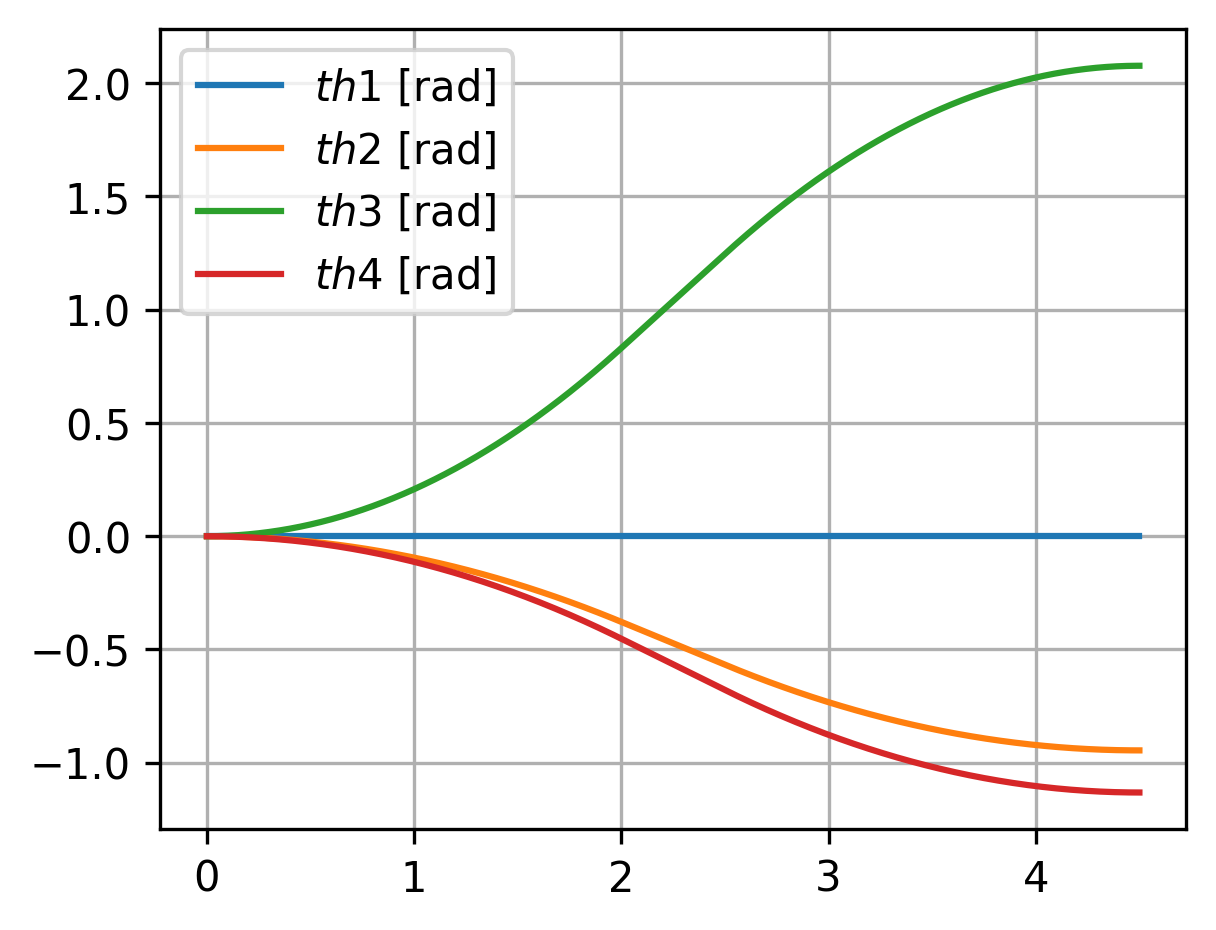

In [24]:
traj_th1 = utils.Path_Gen(0, 0, traj[:,0])
traj_th2 = utils.Path_Gen(0, -0.9455, traj[:,0])
traj_th3 = utils.Path_Gen(0, 2.0769, traj[:,0])
traj_th4 = utils.Path_Gen(0, -1.1314, traj[:,0])

pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(331);
pl.plot(time, traj_th1, time, traj_th2, time, traj_th3, time, traj_th4 );
pl.legend([r'$th1$ [rad]', r'$th2$ [rad]', r'$th3$ [rad]', r'$th4$ [rad]'], loc='best')
pl.grid()

plt.grid(True, axis='y')

plt.show()

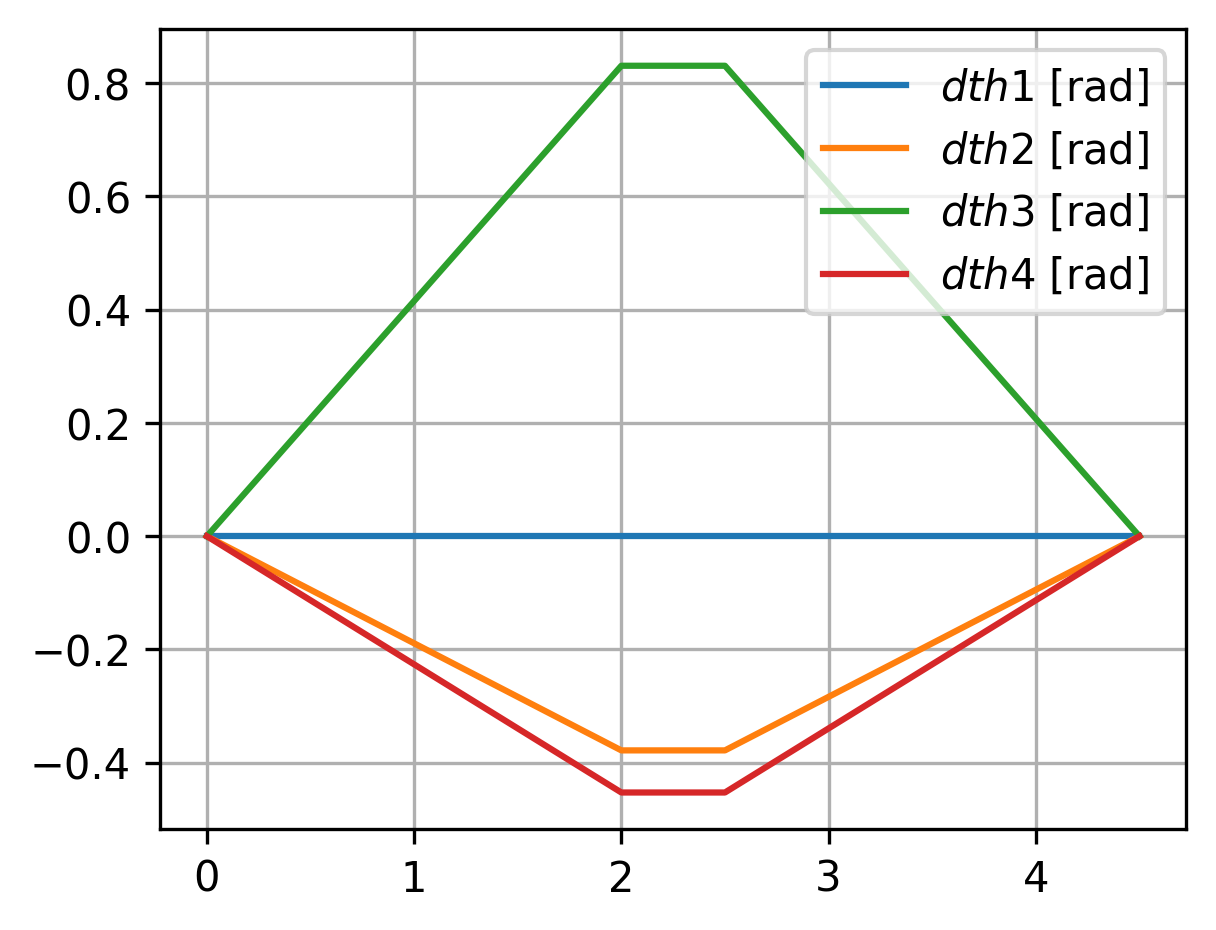

In [25]:
traj_dth1 = utils.Path_Gen(0, 0, traj[:,1])
traj_dth2 = utils.Path_Gen(0, -0.9455, traj[:,1])
traj_dth3 = utils.Path_Gen(0, 2.0769, traj[:,1])
traj_dth4 = utils.Path_Gen(0, -1.1314, traj[:,1])
pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(331);
pl.plot(time, traj_dth1, time, traj_dth2, time, traj_dth3, time, traj_dth4 );
pl.legend([r'$dth1$ [rad]', r'$dth2$ [rad]', r'$dth3$ [rad]', r'$dth4$ [rad]'], loc='best')
pl.grid()

plt.grid(True, axis='y')

plt.show()

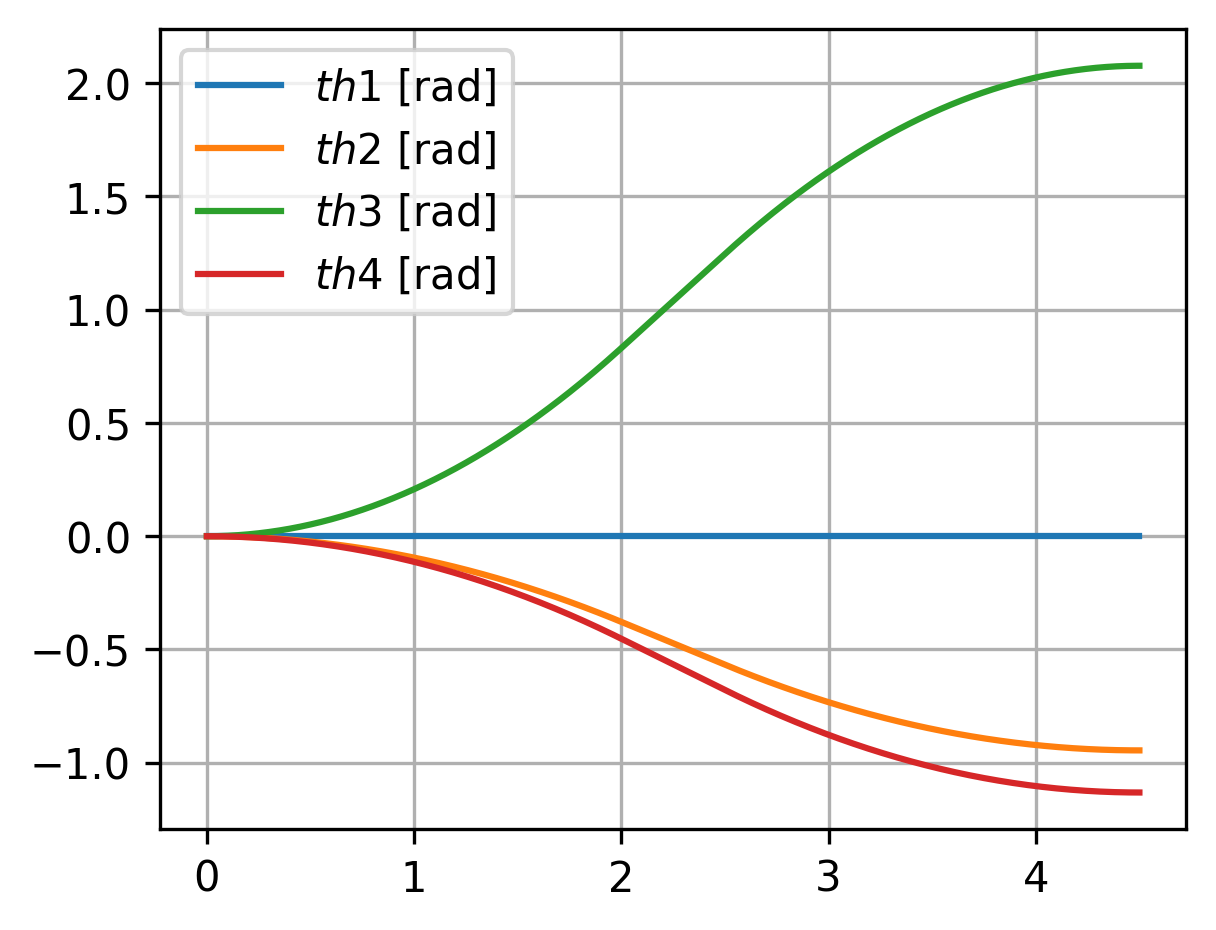

In [26]:
traj_ddth1 = utils.Path_Gen(0, 0, traj[:,2])
traj_ddth2 = utils.Path_Gen(0, -0.9455, traj[:,2])
traj_ddth3 = utils.Path_Gen(0, 2.0769, traj[:,2])
traj_ddth4 = utils.Path_Gen(0, -1.1314, traj[:,2])
pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(331);
pl.plot(time, traj_th1, time, traj_th2, time, traj_th3, time, traj_th4 );
pl.legend([r'$th1$ [rad]', r'$th2$ [rad]', r'$th3$ [rad]', r'$th4$ [rad]'], loc='best')
pl.grid()

plt.grid(True, axis='y')

plt.show()

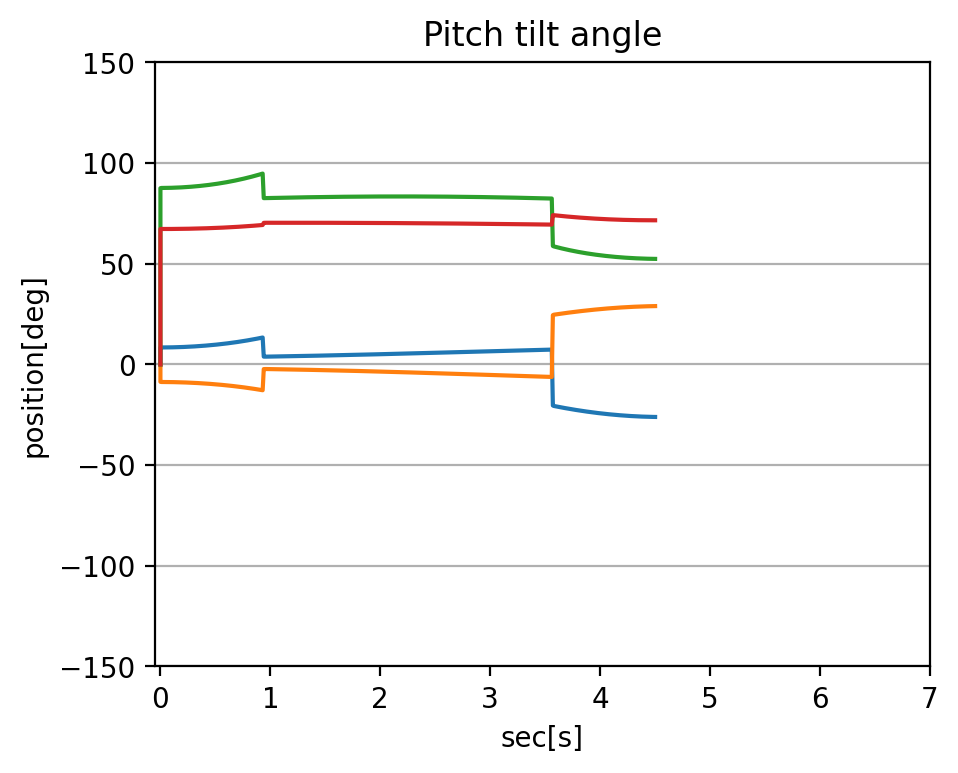

In [27]:
plt.figure(1, figsize=(5,4), dpi=200)
plt.plot(time, torque)

plt.xlabel('sec[s]')
plt.ylabel('position[deg]')
plt.title('Pitch tilt angle')
plt.ylim(-150,150)
plt.xlim(-0.05, 7)
# plt.legend(loc='upper right')
plt.grid(True, axis='y')

plt.show()

In [15]:
time, traj = utils.Trapezoidal_Traj_Gen_Given_Amax_and_T(0.2,4.5,0.01)
traj

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.00000000e-01],
       [ 1.00000000e-05,  2.00000000e-03,  2.00000000e-01],
       ...,
       [ 9.99960000e-01,  4.00000000e-03, -2.00000000e-01],
       [ 9.99990000e-01,  2.00000000e-03, -2.00000000e-01],
       [ 1.00000000e+00,  1.03028697e-14, -2.00000000e-01]])

In [60]:
torque[:,0]

array([  0.        ,  12.93835007,  13.06567604,  13.06994546,
        13.07703224,  13.08693841,  13.09966652,  13.11521969,
        13.1336016 ,  13.15481648,  13.17886912,  13.20576486,
        13.23550958,  13.26810975,  13.30357235,  13.34190493,
        13.38311558,  13.42721293,  13.47420618,  13.52410503,
        13.57691974,  13.63266112,  13.69134047,  13.75296965,
        13.81756104,  13.88512754,  13.95568257,  14.02924005,
        14.10581443,  14.18542066,  14.26807419,  14.35379095,
        14.4425874 ,  14.53448046,  14.62948753,  14.72762651,
        14.82891575,  14.93337408,  15.04102079,  15.15187563,
        15.26595879,  15.38329091,  15.50389308,  15.6277868 ,
        15.75499403,  15.88553711,  16.01943884,  16.1567224 ,
        16.29741138,  16.44152976,  16.58910192,  16.74015263,
        16.89470702,  17.05279061,  17.21442925,  17.3796492 ,
        17.54847703,  17.72093967,  17.89706439,  18.07687879,
        18.26041079,  18.44768865,  18.63874092,  18.83

In [8]:
tau1list = (torque[:,0]).tolist()
tau2list = (torque[:,1]).tolist()
a = [tau1list, tau2list]
